# <center>Consulta de Temperaturas Interactiva<center>

Creación de un programa interactivo para la visualización de datos meteorológicos. Permite al usuario visualizar registros climáticos eligiendo el lugar y el mes. Aplicación de conceptos de creación de gráficos y personalización de estilos.

1. Cargar DataFrame
2. Limpieza de datos
3. Creación de una función que le permita al usuario seleccionar una *ciudad* y un *mes* del año dentro del DataFrame
4. Gráfico de la consulta

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### DataFrame

In [18]:
df = pd.read_csv('../Python para Data Science/Datasets/Datos_Meteorológicos_Arg_2023.csv')
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


### Limpieza de datos

In [19]:
df.isnull().sum()

Fecha                   0
Ciudad                  0
Temperatura Maxima      0
Temperatura Minima      0
Precipitacion           0
Velocidad del Viento    0
Humedad Relativa        0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [21]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 1825 non-null   datetime64[ns]
 1   Ciudad                1825 non-null   object        
 2   Temperatura Maxima    1825 non-null   int64         
 3   Temperatura Minima    1825 non-null   int64         
 4   Precipitacion         1825 non-null   float64       
 5   Velocidad del Viento  1825 non-null   float64       
 6   Humedad Relativa      1825 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 99.9+ KB


### Función

In [24]:
lista_ciudades = df['Ciudad'].unique()

def seleccionar_datos(ciudad, mes):
    return df[(df['Ciudad'] == ciudad) & (df['Fecha'].dt.month == mes)]
    

In [36]:
flag = True
while flag:
    print('Ciudades disponibles: ', lista_ciudades)
    ciudad = input('Seleccione una ciudad: ')

    print('Meses disponibles: ', list(range(1, 13)))
    mes = int(input('Seleccione un mes: '))

    if mes not in range(1, 13) or ciudad not in lista_ciudades:
        print('Mes o ciudad no válidos')
    else:
        flag = False
    
    datos = seleccionar_datos(ciudad, mes)

datos.head()

Ciudades disponibles:  ['Buenos Aires' 'Cordoba' 'Rosario' 'Mendoza' 'Tucuman']
Meses disponibles:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
451,2023-04-01,Cordoba,22,11,0.0,26.4,86.3
456,2023-04-02,Cordoba,22,10,0.0,12.8,48.4
461,2023-04-03,Cordoba,14,12,0.0,36.4,39.3
466,2023-04-04,Cordoba,13,12,0.0,23.0,46.7
471,2023-04-05,Cordoba,23,12,0.0,20.7,31.1


### Gráfica

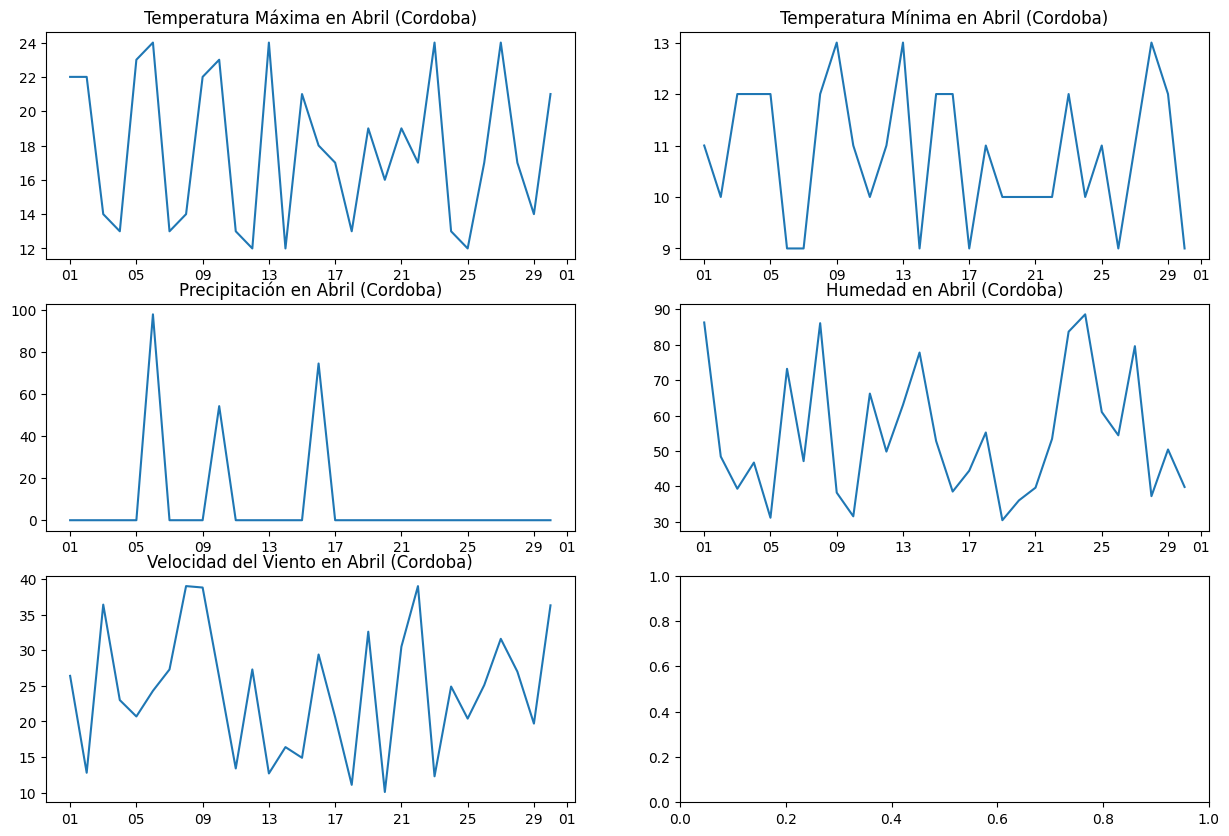

In [55]:
# Gráficos de todos los datos
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
mes_seleccionado = meses[mes - 1]

formato_dia = mdates.DateFormatter('%d')  # Solo el día del mes

# Graficar los datos
ax[0,0].plot(datos['Fecha'], datos['Temperatura Maxima'])
ax[0,0].set_title('Temperatura Máxima en ' + mes_seleccionado + ' (' + ciudad + ')')
ax[0,0].xaxis.set_major_formatter(formato_dia)  # Aplicar formato al eje X

ax[0,1].plot(datos['Fecha'], datos['Temperatura Minima'])
ax[0,1].set_title('Temperatura Mínima en ' + mes_seleccionado + ' (' + ciudad + ')')
ax[0,1].xaxis.set_major_formatter(formato_dia)

ax[1,0].plot(datos['Fecha'], datos['Precipitacion'])
ax[1,0].set_title('Precipitación en ' + mes_seleccionado + ' (' + ciudad + ')')
ax[1,0].xaxis.set_major_formatter(formato_dia)

ax[1,1].plot(datos['Fecha'], datos['Humedad Relativa'])
ax[1,1].set_title('Humedad en ' + mes_seleccionado + ' (' + ciudad + ')')
ax[1,1].xaxis.set_major_formatter(formato_dia)

ax[2,0].plot(datos['Fecha'], datos['Velocidad del Viento'])
ax[2,0].set_title('Velocidad del Viento en ' + mes_seleccionado + ' (' + ciudad + ')')
ax[2,0].xaxis.set_major_formatter(formato_dia)